In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
catboost1000 = pd.read_csv("../submit/baseline_0_catboost_240130174402.csv")
lightgbm10000 = pd.read_csv("../submit/iteration10000_lightgbm_240130221403.csv")

c:\Users\ghckd\anaconda3\envs\store-sales\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ghckd\anaconda3\envs\store-sales\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


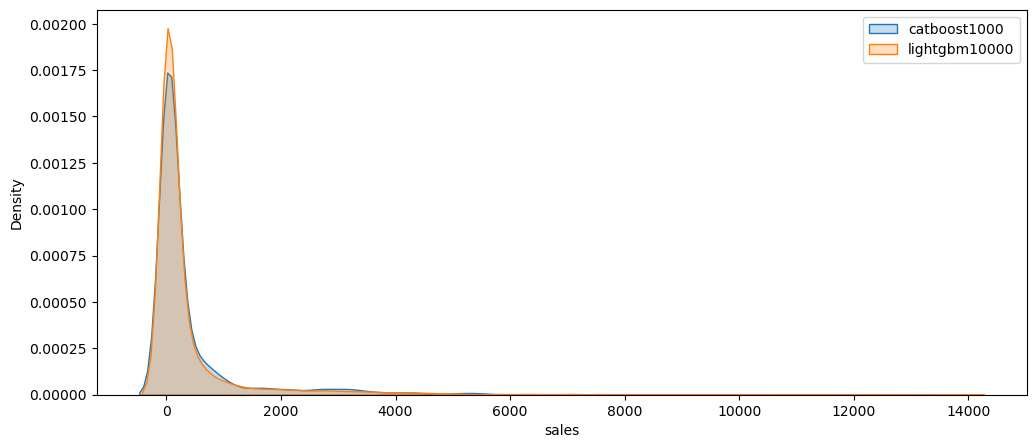

In [14]:
plt.figure(figsize=(12, 5))
sns.kdeplot(catboost1000["sales"], fill=True, label="catboost1000")
sns.kdeplot(lightgbm10000["sales"], fill=True, label="lightgbm10000")
plt.legend()
plt.show()

In [28]:
import numpy as np
ensemble = catboost1000.copy()
ensemble["catboost1000"] = ensemble["sales"]
ensemble = ensemble.drop(columns="sales")
ensemble["lightgbm10000"] = lightgbm10000["sales"]

In [36]:
ensemble["sales"] = ensemble[["catboost1000", "lightgbm10000"]].apply(np.mean, axis=1)

In [38]:
ensemble = ensemble.drop(columns=["catboost1000", "lightgbm10000"])

In [39]:
ensemble.to_csv("../submit/ensemble.csv", index=False)